# Multiple Logistics Regression Confuse Matrices

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()

X = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='auto')
log_reg.fit(X_train, y_train)
log_reg.score(X_train, y_train)

D:\appCommon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9955456570155902

In [7]:
y_predict = log_reg.predict(X_test)

- 可以通过设置 precision_score 函数的 average 属性值处理多分类问题
- 默认是 binary

In [9]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict, average='micro')

0.9555555555555556

### 1. 多分类问题的混淆矩阵

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[45,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 49,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  1,  0,  0,  3,  0],
       [ 0,  1,  0,  0, 47,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 36,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  1,  0,  1,  1,  1,  0,  0,  0, 41]], dtype=int64)

- 列为真值，行为预测值。类比二分类的混淆矩阵

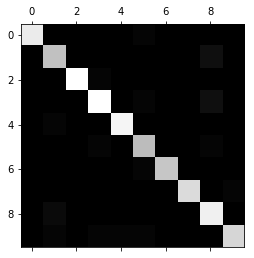

In [12]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)

- 越亮的地方表示预测的越正确

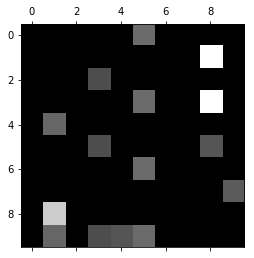

In [13]:
# 沿着列的方向求和，即求每一行的和
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
# 将对角线的位置填成 0
np.fill_diagonal(err_matrix, 0)
# 绘制 err_matrix
plt.matshow(err_matrix, cmap=plt.cm.gray)

- 越亮的地方表示犯错误越多